In [3]:
import numpy as np
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_images = train_images.astype('float32')/255
train_images_bl = train_images.reshape((60000, 28*28))

test_images = test_images.astype('float32')/255
test_images_bl = test_images.reshape((10000, 28*28))

In [5]:
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

In [5]:
# Baseline Neural Network from L2
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# network.fit(train_images,train_labels, epochs=20, batch_size=128)
training_history = network.fit(
    train_images,
    train_labels,
    epochs=100,
    validation_data=(test_images, test_labels),
)

Epoch 1/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2046 - accuracy: 0.9398 - val_loss: 0.1261 - val_accuracy: 0.9639
Epoch 2/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0898 - accuracy: 0.9736 - val_loss: 0.0858 - val_accuracy: 0.9741
Epoch 3/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0662 - accuracy: 0.9815 - val_loss: 0.0829 - val_accuracy: 0.9771
Epoch 4/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0508 - accuracy: 0.9861 - val_loss: 0.0798 - val_accuracy: 0.9794
Epoch 5/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0421 - accuracy: 0.9887 - val_loss: 0.0795 - val_accuracy: 0.9797
Epoch 6/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0340 - accuracy: 0.9910 - val_loss: 0.0877 - val_accuracy: 0.9798
Epoch 7/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0280 - accuracy: 0.9926 - val_loss: 0.0918 

In [6]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn

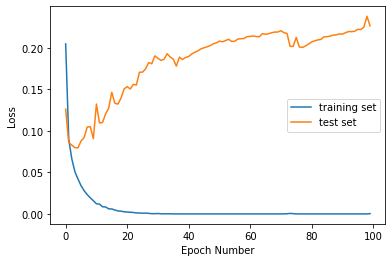

In [6]:
# test_loss, test_acc = network.evaluate(test_images, test_labels)
# print(test_acc)
# test_predict = network.predict(test_images)

plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

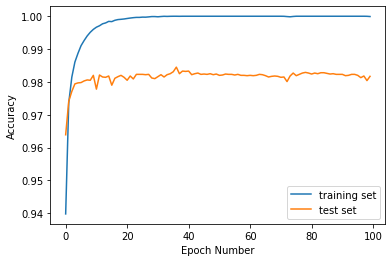

In [7]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2264 - accuracy: 0.9817
0.9817000031471252


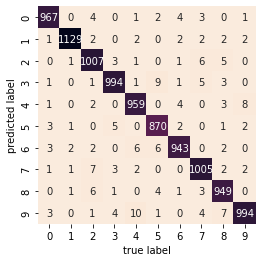

In [9]:
test_predict = network.predict(test_images)
mat = metrics.confusion_matrix(test_labels.argmax(axis=1), test_predict.argmax(axis=1))
sn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=sn.cm.rocket_r)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [7]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [8]:
# New CNN model
network_t = models.Sequential()
network_t.add(layers.Conv2D(32, 3, padding="same", activation = 'relu', input_shape=(28, 28, 1)))
network_t.add(layers.MaxPooling2D(2, 2))
network_t.add(layers.Conv2D(64, 3, padding="same", activation = 'relu'))
network_t.add(layers.Conv2D(64, 3, padding="same", activation = 'relu'))
network_t.add(layers.MaxPooling2D(2, 2))
network_t.add(layers.Flatten())
network_t.add(layers.Dense(512, activation = 'relu'))
network_t.add(layers.Dense(10, activation='softmax'))
network_t.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
network_t.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [9]:
training_history = network_t.fit(
    train_images,
    train_labels,
    epochs=100,
    validation_data=(test_images, test_labels),
)

Epoch 1/100
1875/1875 [==============================] - 179s 95ms/step - loss: 0.1034 - accuracy: 0.9683 - val_loss: 0.0739 - val_accuracy: 0.9765
Epoch 2/100
1875/1875 [==============================] - 175s 94ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0349 - val_accuracy: 0.9877
Epoch 3/100
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0276 - val_accuracy: 0.9914
Epoch 4/100
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0272 - val_accuracy: 0.9915
Epoch 5/100
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.0300 - val_accuracy: 0.9919
Epoch 6/100
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.0291 - val_accuracy: 0.9922
Epoch 7/100
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0095 - accuracy: 0.9969 - val_

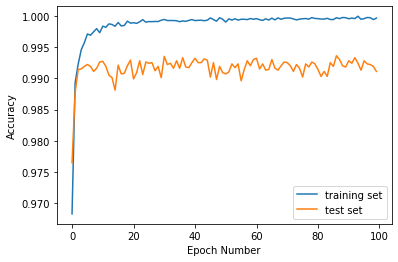

In [10]:
# plot accuracy graph
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()